<a href="https://colab.research.google.com/github/SiyiGit/github_actions/blob/main/CNN_model_06022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opendatasets
!pip install opendatasets

In [2]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [3]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:17<00:00, 168MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [4]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
#data_dir_test = './new-plant-diseases-dataset/test/test'

In [5]:
## Defining batch specfications
batch_size = 200
img_height = 128
img_width = 128

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import metrics

In [7]:
# split the train set as train and validation (20%)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest',
                                  validation_split=0.2)
train_data = train_datagen.flow_from_directory(data_dir_train,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training', # set as training data
                                               shuffle=True)

val_data = train_datagen.flow_from_directory(data_dir_train, # same directory as training data
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='validation', # set as validation data
                                             shuffle=True)

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


In [8]:
## loading test set from validation folders
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(data_dir_val,
                                            batch_size=batch_size,
                                            target_size=(img_height, img_width),
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 17572 images belonging to 38 classes.


In [9]:
## Defining model layers
inputs = Input(shape = (img_width, img_height,3), name = "Input")

first_layer = Conv2D(filters = 32,
                     kernel_size = 3,
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = 3,
                     padding = 'valid',
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Dropout(rate = 0.2)

sixth_layer = Flatten()

seventh_layer = Dense(units = 256,
                    activation = 'relu')

eighth_layer = Dense(units = 64,
                    activation = 'relu')


output_layer = Dense(units = 38,
                     activation='softmax')

x=first_layer(inputs)
x=second_layer(x)
x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)
x=sixth_layer(x)
x=seventh_layer(x)
x=eighth_layer(x)
outputs=output_layer(x)

cnn_model = Model(inputs = inputs, outputs = outputs)



In [10]:
cnn_model.compile(loss='categorical_crossentropy', # loss function
                  optimizer='adam',                # gradien descent algorithm
                  metrics=['accuracy'])           # accuracy metric)


In [11]:
print(cnn_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0     

In [12]:
training_history = cnn_model.fit(train_data,
                                 validation_data= val_data,
                                 epochs = 20,
                                 batch_size = 100)

Epoch 1/20
282/282 [==============================] - 396s 1s/step - loss: 2.1426 - accuracy: 0.3912 - val_loss: 1.2779 - val_accuracy: 0.6070
Epoch 2/20
282/282 [==============================] - 357s 1s/step - loss: 1.0655 - accuracy: 0.6720 - val_loss: 0.9169 - val_accuracy: 0.7156
Epoch 3/20
282/282 [==============================] - 354s 1s/step - loss: 0.7579 - accuracy: 0.7618 - val_loss: 0.7151 - val_accuracy: 0.7726
Epoch 4/20
282/282 [==============================] - 354s 1s/step - loss: 0.6140 - accuracy: 0.8066 - val_loss: 0.5942 - val_accuracy: 0.8122
Epoch 5/20
282/282 [==============================] - 356s 1s/step - loss: 0.5227 - accuracy: 0.8322 - val_loss: 0.4947 - val_accuracy: 0.8399
Epoch 6/20
282/282 [==============================] - 355s 1s/step - loss: 0.4553 - accuracy: 0.8539 - val_loss: 0.5589 - val_accuracy: 0.8222
Epoch 7/20
282/282 [==============================] - 354s 1s/step - loss: 0.4074 - accuracy: 0.8694 - val_loss: 0.4609 - val_accuracy: 0.8500

In [13]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

#learning_rate = training_history.history['lr']

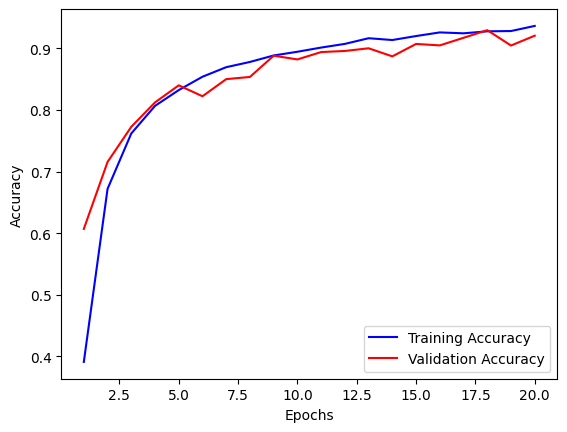

In [16]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(np.arange(1 , 21, 1),
         train_acc,
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 21, 1),
         val_acc,
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()

plt.show()

In [18]:
test_pred = cnn_model.predict(test_data)

test_pred_class = test_pred.argmax(axis = 1)


88/88 [==============================] - 27s 303ms/step


In [24]:
test_data.classes


array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [25]:
y_test_class =test_data.classes

print(metrics.classification_report(y_test_class, test_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       504
           1       0.59      0.99      0.74       497
           2       0.98      0.86      0.92       440
           3       0.85      0.86      0.86       502
           4       0.96      0.69      0.80       454
           5       0.98      0.93      0.95       421
           6       0.87      0.90      0.89       456
           7       0.66      0.88      0.75       410
           8       0.99      0.95      0.97       477
           9       0.93      0.70      0.80       477
          10       1.00      0.88      0.94       465
          11       0.72      0.60      0.65       472
          12       0.56      0.99      0.72       480
          13       0.85      0.95      0.90       430
          14       0.89      0.83      0.86       423
          15       0.99      0.87      0.92       503
          16       0.96      0.75      0.84       459
          17       0.98    

In [35]:
cnn_model.save("model.h5")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[[433  26   1 ...   0   0   1]
 [  0 493   0 ...   0   0   2]
 [  3   1 380 ...   0   1   1]
 ...
 [  0   0   0 ... 376   0   0]
 [  0  13   0 ...   0 323  66]
 [  2   0   0 ...   0   0 479]]


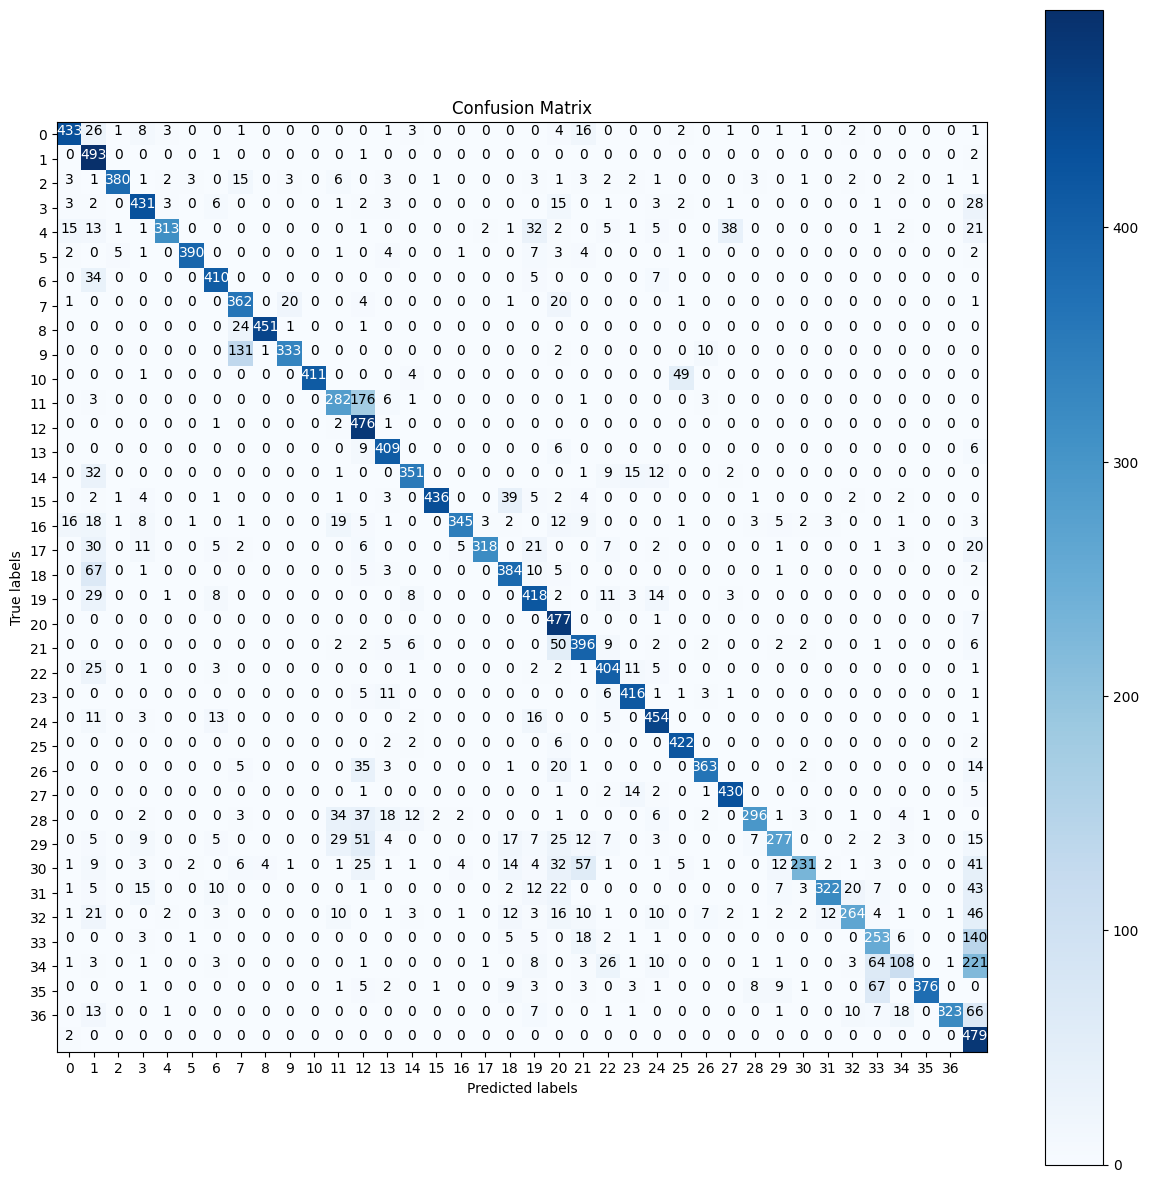

In [31]:
import itertools

#confusion Matrix
cnn_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
print(cnn_matrix)

classes = range(0,37)

plt.figure(figsize=(15,15))

plt.imshow(cnn_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnn_matrix.shape[0]), range(cnn_matrix.shape[1])):
    plt.text(j, i, cnn_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnn_matrix[i, j] > ( cnn_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()



In [34]:
# still need to work on this one
error_indexes = []
for i in range(len(test_pred)):
    if (test_pred_class[i] != y_test_class[i]):
        if(y_test_class[i] == 33 or y_test_class[i] == 34):
            if(test_pred_class[i] == 37 ):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = test_data[i]
    img = img.reshape(28, 28)

    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred[i][test_pred_class[i]], 2)))


ValueError: Asked to retrieve element 16145, but the Sequence has length 88